In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from data_analysis_preparation.utils import (filter_biocard_diagnosis_criteria,
                                             get_joined_biocard_df)

### Load data

In [24]:
BIOCARD_SCANS_DIRECTORY = r"/media/dpolak/MRI/FULL_PIPELINE_BIOCARD"
BIOCARD_DIAGNOSIS_DATA = r"../DATA/BIOCARD_DiagnosisData_Limited_2022.05.14.xlsx"  # You need to download BIOCARD_DiagnosisData_Limited_2022.05.14.xlsx file
BIOCARD_DEMOGRAPHIC_DATA = r"../DATA/BIOCARD_Demographics_Limited_Data_2022.05.10.xlsx"  # You need to download BIOCARD_Demographics_Limited_Data_2022.05.10.xlsx file
BIOCARD_FUNCTIONAL_DATA = r"../DATA/BIOCARD_Functional_Evaluation_Limited_2022.05.16.xlsx"  # You need to download BIOCARD_Functional_Evaluation_Limited_2022.05.16.xlsx file
BIOCARD_COGNITIVE_DATA = r"../DATA/BIOCARD_CognitiveData_Limited_2022.05.14.xlsx"  # You need to download BIOCARD_CognitiveData_Limited_2022.05.14.xlsx file
BIOCARD_MRI_SUBJECT_DATA = "../DATA/BIOCARD_SUBJECTS.csv"

In [25]:
df_biocard = get_joined_biocard_df(biocard_diagnosis_data=BIOCARD_DIAGNOSIS_DATA,
                                   biocard_mri_subject_data=BIOCARD_MRI_SUBJECT_DATA,
                                   scans_path=BIOCARD_SCANS_DIRECTORY,
                                    biocard_demographic_data=BIOCARD_DEMOGRAPHIC_DATA,
                                    biocard_functional_data=BIOCARD_FUNCTIONAL_DATA,
                                    biocard_cognitive_data=BIOCARD_COGNITIVE_DATA)

/home/dpolak/miniconda3/envs/adct/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/dpolak/miniconda3/envs/adct/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [26]:
df_biocard_revised = filter_biocard_diagnosis_criteria(df_biocard)
df_biocard_revised = df_biocard_revised[df_biocard_revised["SCANTYPE"] == "MPRAGE"]

### Demographics

In [27]:
df_biocard_revised[["SEX"]].value_counts()

SEX   
Female    281
Male      165
Name: count, dtype: int64

In [28]:
df_biocard_revised[["AGE"]].describe()

,AGE
count,446.000000
mean,70.524664
std,8.550607
min,34.000000
25%,67.000000
50%,72.000000
75%,75.750000
max,93.000000


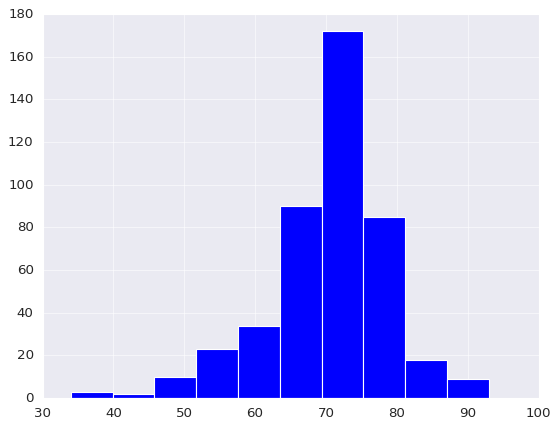

In [29]:
age_hist = df_biocard_revised['AGE'].hist()
fig = age_hist.get_figure()
fig.savefig("BIOCARD_age_histogram")

In [30]:
df_patients = df_biocard_revised[["JHUANONID", "AGE", "DX", "SEX"]].groupby("JHUANONID").agg({"AGE": "mean", "DX": "first", "SEX": "first"})
df_patients['AGE'] = df_patients['AGE'].astype(int)

In [31]:
pd.DataFrame({
 "age_AD": df_patients[df_patients["DX"] == "AD"]["AGE"].describe(),
 "age_AD_female": df_patients[(df_patients["DX"] == "AD") & (df_patients["SEX"] == "Female")]["AGE"].describe(),
 "age_AD_male": df_patients[(df_patients["DX"] == "AD") & (df_patients["SEX"] == "Male")]["AGE"].describe()
})

,age_AD,age_AD_female,age_AD_male
count,6.000000,3.0,3.000000
mean,79.333333,75.0,83.666667
std,7.089899,7.0,4.509250
min,70.000000,70.0,79.000000
25%,73.750000,71.0,81.500000
50%,81.000000,72.0,84.000000
75%,83.750000,77.5,86.000000
max,88.000000,83.0,88.000000


In [32]:
pd.DataFrame({
 "age_MCI": df_patients[df_patients["DX"] == "MCI"]["AGE"].describe(),
 "age_MCI_female": df_patients[(df_patients["DX"] == "MCI") & (df_patients["SEX"] == "Female")]["AGE"].describe(),
 "age_MCI_male": df_patients[(df_patients["DX"] == "MCI") & (df_patients["SEX"] == "Male")]["AGE"].describe()
})

,age_MCI,age_MCI_female,age_MCI_male
count,61.000000,31.000000,30.000000
mean,72.393443,71.774194,73.033333
std,6.693974,7.753320,5.448716
min,52.000000,52.000000,64.000000
25%,68.000000,68.500000,68.250000
50%,73.000000,73.000000,73.000000
75%,76.000000,76.000000,75.750000
max,88.000000,86.000000,88.000000


In [33]:
pd.DataFrame({
 "age_CN": df_patients[df_patients["DX"] == "CN"]["AGE"].describe(),
 "age_CN_female": df_patients[(df_patients["DX"] == "CN") & (df_patients["SEX"] == "Female")]["AGE"].describe(),
 "age_CN_male": df_patients[(df_patients["DX"] == "CN") & (df_patients["SEX"] == "Male")]["AGE"].describe()
})

,age_CN,age_CN_female,age_CN_male
count,134.000000,89.000000,45.000000
mean,67.373134,67.337079,67.444444
std,9.646123,9.548850,9.944289
min,34.000000,37.000000,34.000000
25%,62.250000,62.000000,63.000000
50%,70.000000,70.000000,70.000000
75%,74.000000,74.000000,75.000000
max,90.000000,90.000000,89.000000


/home/dpolak/miniconda3/envs/adct/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


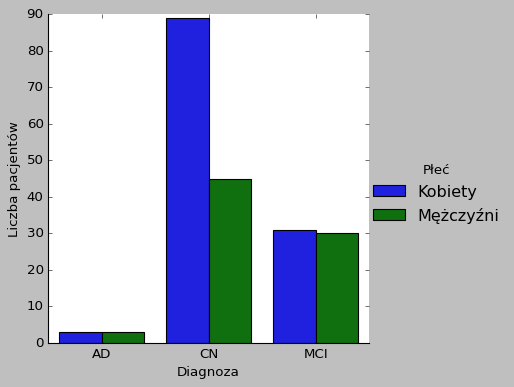

In [35]:
plot_data = df_patients[["DX", "SEX"]].groupby(["DX", "SEX"]).size().reset_index(name="count")
plot_data.columns = ["Diagnoza", "Płeć", "Liczba pacjentów"]
plot_data["Płeć"] = plot_data["Płeć"].map({"Male": "Mężczyźni", "Female": "Kobiety"})
plt.style.use('classic')
sns.catplot(x="Diagnoza", y="Liczba pacjentów", hue="Płeć", data=plot_data, kind="bar").savefig("BIOCARD_diagnosis_sex")